# Fraud Detection Project

## Collaboration Plan
**Participants:** Ryan Tang and Santiago von Straussburg

**Github Page**: https://ryantangmj.github.io

### Overview
We are collaboratively analyzing two fraud datasets to explore fraud patterns, feature importance, and machine learning model evaluation.

- **First dataset:** `Cargo_fraud_only.csv`, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- **Second dataset:** Twelve-month and one-month arrest data for fraud, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- **Third dataset:** Yearly unemployment index by State, obtained from [BLS Database](https://data.bls.gov/lausmap/showMap.jsp)


### Technologies Used
1. **GitHub Repository**: For version control, code collaboration, and final project hosting.
2. **Google Colab/Jupyter Notebooks**: For ETL, EDA, and model development.
3. **Discord**: Primary communication platform for real-time discussions.
   - Weekly meetings at 08:00 PM CST on Thursdays for progress reviews and planning.

### Current Focus
Both team members are currently working together on data exploration, including Extraction, Transformation, and Load (ETL) processes, as well as Exploratory Data Analysis (EDA).

### Roadmap & Milestones
#### Milestone 1 – Initial Dataset Selection & ETL
- Identify datasets. - **Completed**
- Perform initial ETL on datasets. - **Completed**
- Establish a GitHub repository and GitHub Pages site. - **Completed**
- Develop basic statistics and initial graph for dataset understanding. - **Completed**

#### Milestone 2 – Additional ETL & Exploratory Data Analysis
- Continue data cleaning and transformation. - **Completed**
- Conduct comprehensive EDA with 3-5 key graphs. - **Completed**
- Present the first project pitch with initial findings. - **Completed**

#### Deliverable 1 – In-Class Presentation
- Finalize and present a 5-7 slide deck covering problem statement, ETL, EDA, and project progress. - **Completed**

#### Milestone 3 – Model Development & Evaluation
- Select machine learning models (Random Forest, XGBoost, Logistic Regression).
- Begin model training and evaluation.
- Analyze model performance and feature importance.

#### Deliverable 2 – Final Website & Presentation
- Finalize project with the deployment of results to the GitHub Pages site.
- Prepare the final presentation summarizing the project lifecycle.

---

## Project Goals

The goal of this collaborative project is to analyze fraud patterns, identify significant features contributing to fraud, and evaluate various machine learning models for fraud detection. By leveraging two distinct datasets, we aim to develop a deep understanding of fraudulent behavior and build predictive models that will aid in identifying and mitigating fraud across different sectors. Specifically, our objectives are as follows:

### 1. Fraud Pattern Analysis
- **Objective:** Investigate patterns and trends in fraud activities across different sectors, particularly cargo-related fraud and arrest data for fraud cases. This will involve examining how fraudulent activities vary over time and geographic locations, and identifying key factors that influence fraud prevalence.

### 2. Feature Importance Assessment
- **Objective:** Analyze and rank the importance of different features contributing to fraud detection. By evaluating features such as transaction details, timestamps, geographic data, and socio-economic indicators, we aim to pinpoint the key variables that can most accurately predict fraud occurrences.

### 3. Machine Learning Model Development & Evaluation
- **Objective:** Develop and compare multiple machine learning models (Random Forest, XGBoost, Logistic Regression) to identify the most effective model for predicting fraud cases. The models will be evaluated on their performance using metrics such as accuracy, precision, recall, and F1-score to ensure robust fraud detection capabilities.

### 4. Comprehensive Data Analysis
- **Objective:** Through thorough data exploration and analysis, we aim to create a holistic view of fraud activities, utilizing exploratory data analysis (EDA) techniques. This will include visualizing fraud trends, uncovering hidden relationships, and establishing baseline statistics.

### 5. Actionable Insights & Final Presentation
- **Objective:** By the end of the project, we aim to deliver a comprehensive set of insights that can inform decision-making regarding fraud prevention and detection strategies. These findings will be shared through a final presentation and a dedicated project website hosted via GitHub Pages.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy.stats import linregress
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the cargo fraud data
cargo_fraud = pd.read_csv('cargo_fraud_only.csv')

# Check if 'data_year' column exists
if 'data_year' in cargo_fraud.columns:
    # Use 'data_year' as 'Year'
    cargo_fraud['Year'] = cargo_fraud['data_year'].astype(int)
else:
    # Extract 'Year' from 'date_recovered' or another date column
    cargo_fraud['date_recovered'] = pd.to_datetime(cargo_fraud['date_recovered'], errors='coerce')
    cargo_fraud['Year'] = cargo_fraud['date_recovered'].dt.year
    cargo_fraud = cargo_fraud.dropna(subset=['Year'])
    cargo_fraud['Year'] = cargo_fraud['Year'].astype(int)

# Ensure the 'State' column exists and matches the 'State' in 'state_unemployment'
if 'state_name' in cargo_fraud.columns:
    cargo_fraud['State'] = cargo_fraud['state_name']
else:
    # Map state abbreviations to full state names
    state_abbrev_to_name = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }
    cargo_fraud['State'] = cargo_fraud['state_abbr'].map(state_abbrev_to_name)

# Exclude rows with missing 'State' or 'Year'
cargo_fraud = cargo_fraud.dropna(subset=['State', 'Year'])

# Exclude Puerto Rico and other territories
cargo_fraud = cargo_fraud[~cargo_fraud['State'].isin(exclude_states)]

# Display the processed cargo fraud data
print(cargo_fraud[['State', 'Year']].head())



In [ ]:
# Load arrest data
arrest_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/fraud_onemonth_data.csv"
arrest_data = pd.read_csv(arrest_data_url, index_col=0)
arrest_data.reset_index(drop=True, inplace=True)

# Display the first few rows
arrest_data.head()


In [ ]:
# Load HPI data
hpi_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/hpi_by_state.csv"
hpi_data = pd.read_csv(hpi_data_url)

# Keep relevant columns
hpi_data = hpi_data[["State", "Year", "HPI"]]

# Filter years between 2012 and 2022
hpi_data = hpi_data[(hpi_data["Year"] >= 2012) & (hpi_data["Year"] <= 2022)].reset_index(drop=True)

hpi_data['State'] = hpi_data['State'].str.lower()
hpi_data['Year'] = hpi_data['Year'].astype(int)

# Display the first few rows
hpi_data.head()


In [64]:
# Load poverty data
poverty_data = pd.read_csv('poverty_data.csv')  # Replace with the actual file path

# Reshape poverty data to long format
id_vars = ['State']
value_vars = [col for col in poverty_data.columns if col != 'State']

poverty_long = pd.melt(poverty_data, id_vars=id_vars, value_vars=value_vars,
                       var_name='Variable', value_name='Value')

poverty_long['Year'] = poverty_long['Variable'].str.extract('(\d{4})', expand=False)
poverty_long['Variable_Name'] = poverty_long['Variable'].str.replace(' \d{4}', '', regex=True)

poverty_pivot = poverty_long.pivot_table(index=['State', 'Year'], columns='Variable_Name', values='Value', aggfunc='first').reset_index()
poverty_pivot.columns.name = None

poverty_pivot['Year'] = poverty_pivot['Year'].astype(int)
poverty_pivot['State'] = poverty_pivot['State'].str.lower()

# Convert numeric columns to float
numeric_cols = ['Total population', 'Number in poverty', 'Percentage poverty']
for col in numeric_cols:
    # Convert the column to string first, handling NaN values
    poverty_pivot[col] = poverty_pivot[col].astype(str).replace('nan', '').str.replace(',', '')
    poverty_pivot[col] = poverty_pivot[col].replace('', pd.NA)
    poverty_pivot[col] = poverty_pivot[col].astype(float)

# Rename columns for clarity
poverty_pivot.rename(columns={
    'Total population': 'Total_Population',
    'Number in poverty': 'Number_in_Poverty',
    'Percentage poverty': 'Poverty_Rate'
}, inplace=True)

# Display the first few rows
print(poverty_pivot.head())


     State  Year  Number_in_Poverty  Poverty_Rate  Total_Population
0  alabama  2012              777.0          16.2            4808.0
1  alabama  2013              891.0          18.5            4807.0
2  alabama  2014              848.0          17.8            4765.0
3  alabama  2015              784.0          16.3            4820.0
4  alabama  2016              782.0          16.2            4821.0


In [ ]:
# Load homelessness data
homelessness_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/homeless_data.csv"
homelessness_data = pd.read_csv(homelessness_data_url)

# Display the first few rows
homelessness_data.head()


### Education

In [74]:
# Load education data
education_data = pd.read_csv('education.csv')  # Replace with the actual file path

# Display the first few rows to verify the structure
print("Initial Education Data:")
print(education_data.head())

# Identify columns related to education metrics for years 2012-2022
education_cols = [col for col in education_data.columns if any(str(year) in col for year in range(2012, 2023))]

# Keep 'State' and the identified education columns
education_data = education_data[['State'] + education_cols]

# Melt the data to long format
education_long = pd.melt(
    education_data,
    id_vars=['State'],
    value_vars=education_cols,
    var_name='Variable',
    value_name='Value'
)

# Extract 'Year' and 'Education_Variable' from the 'Variable' column
education_long['Year'] = education_long['Variable'].str.extract('(\d{4})', expand=False)
education_long['Education_Variable'] = education_long['Variable'].str.replace(' \d{4}', '', regex=True)

# Drop rows where 'Year' is NaN
education_long = education_long.dropna(subset=['Year'])

# Pivot the data to have one row per 'State' and 'Year'
education_pivot = education_long.pivot_table(
    index=['State', 'Year'],
    columns='Education_Variable',
    values='Value',
    aggfunc='first'
).reset_index()

# Flatten the columns
education_pivot.columns.name = None

# Convert 'Year' to integer
education_pivot['Year'] = education_pivot['Year'].astype(int)

# Convert 'State' to lowercase for consistency
education_pivot['State'] = education_pivot['State'].str.lower()

# Map state abbreviations to full state names if necessary
state_abbrev_to_name = {
    'al': 'alabama', 'ak': 'alaska', 'az': 'arizona', 'ar': 'arkansas',
    'ca': 'california', 'co': 'colorado', 'ct': 'connecticut', 'de': 'delaware',
    'fl': 'florida', 'ga': 'georgia', 'hi': 'hawaii', 'id': 'idaho',
    'il': 'illinois', 'in': 'indiana', 'ia': 'iowa', 'ks': 'kansas',
    'ky': 'kentucky', 'la': 'louisiana', 'me': 'maine', 'md': 'maryland',
    'ma': 'massachusetts', 'mi': 'michigan', 'mn': 'minnesota', 'ms': 'mississippi',
    'mo': 'missouri', 'mt': 'montana', 'ne': 'nebraska', 'nv': 'nevada',
    'nh': 'new hampshire', 'nj': 'new jersey', 'nm': 'new mexico', 'ny': 'new york',
    'nc': 'north carolina', 'nd': 'north dakota', 'oh': 'ohio', 'ok': 'oklahoma',
    'or': 'oregon', 'pa': 'pennsylvania', 'ri': 'rhode island', 'sc': 'south carolina',
    'sd': 'south dakota', 'tn': 'tennessee', 'tx': 'texas', 'ut': 'utah',
    'vt': 'vermont', 'va': 'virginia', 'wa': 'washington', 'wv': 'west virginia',
    'wi': 'wisconsin', 'wy': 'wyoming', 'dc': 'district of columbia'
}

# If 'State' column has abbreviations (length 2), map to full names
if education_pivot['State'].str.len().max() == 2:
    education_pivot['State'] = education_pivot['State'].map(state_abbrev_to_name)

# Convert numeric columns to float
numeric_cols = [col for col in education_pivot.columns if col not in ['State', 'Year']]
for col in numeric_cols:
    # Convert to string and remove commas and percent signs
    education_pivot[col] = education_pivot[col].astype(str).str.replace(',', '').str.replace('%', '')
    # Convert to numeric, coercing errors to NaN
    education_pivot[col] = pd.to_numeric(education_pivot[col], errors='coerce')

# Rename columns for clarity (adjust based on actual column names)
# Example:
# education_pivot.rename(columns={
#     "Percentage with Bachelor's Degree": 'Bachelor_Degree_Rate'
# }, inplace=True)

# Display the first few rows of the processed education data
print("\nProcessed Education Data (2012-2022):")
print(education_pivot.head())

Initial Education Data:
   FIPS Code State       Area name  2003 Urban Influence Code  \
0          0    US   United States                        NaN   
1       1000    AL         Alabama                        NaN   
2       1001    AL  Autauga County                        2.0   
3       1003    AL  Baldwin County                        5.0   
4       1005    AL  Barbour County                        6.0   

   2013 Urban Influence Code  2013 Rural-urban Continuum Code  \
0                        NaN                              NaN   
1                        NaN                              NaN   
2                        2.0                              2.0   
3                        2.0                              3.0   
4                        6.0                              6.0   

   2023 Rural-urban Continuum Code Less than a high school diploma, 1970  \
0                              NaN                            52,373,312   
1                              NaN        

### Clean Up

In [ ]:
# Reset index and check for missing values
cargo_fraud.reset_index(drop=True, inplace=True)
print(cargo_fraud.isnull().sum())


In [ ]:
# Convert 'State Code' to string and strip whitespace
arrest_data['State Code'] = arrest_data['State Code'].astype(str).str.strip()

# Map state codes to state names
state_codes = {
    '50': 'Alaska',
    '01': 'Alabama',
    '03': 'Arkansas',
    '54': 'American Samoa',
    '02': 'Arizona',
    '04': 'California',
    '05': 'Colorado',
    '06': 'Connecticut',
    '52': 'Canal Zone',
    '08': 'District of Columbia',
    '07': 'Delaware',
    '09': 'Florida',
    '10': 'Georgia',
    '55': 'Guam',
    '51': 'Hawaii',
    '14': 'Iowa',
    '11': 'Idaho',
    '12': 'Illinois',
    '13': 'Indiana',
    '15': 'Kansas',
    '16': 'Kentucky',
    '17': 'Louisiana',
    '20': 'Massachusetts',
    '19': 'Maryland',
    '18': 'Maine',
    '21': 'Michigan',
    '22': 'Minnesota',
    '24': 'Missouri',
    '23': 'Mississippi',
    '25': 'Montana',
    '26': 'Nebraska',
    '32': 'North Carolina',
    '33': 'North Dakota',
    '28': 'New Hampshire',
    '29': 'New Jersey',
    '30': 'New Mexico',
    '27': 'Nevada',
    '31': 'New York',
    '34': 'Ohio',
    '35': 'Oklahoma',
    '36': 'Oregon',
    '37': 'Pennsylvania',
    '53': 'Puerto Rico',
    '38': 'Rhode Island',
    '39': 'South Carolina',
    '40': 'South Dakota',
    '41': 'Tennessee',
    '42': 'Texas',
    '43': 'Utah',
    '62': 'Virgin Islands',
    '45': 'Virginia',
    '44': 'Vermont',
    '46': 'Washington',
    '48': 'Wisconsin',
    '47': 'West Virginia',
    '49': 'Wyoming'
}

arrest_data['State'] = arrest_data['State Code'].map(state_codes)

# Display the first few rows
arrest_data.head()


In [ ]:
# Load the unemployment data
unemployment_data = pd.read_csv('Unemployment.csv')

# Identify columns that contain 'Unemployment_rate'
unemployment_rate_cols = [col for col in unemployment_data.columns if 'Unemployment_rate_' in col]

# Melt the DataFrame to long format
unemployment_long = pd.melt(
    unemployment_data,
    id_vars=['State', 'Area_Name'],
    value_vars=unemployment_rate_cols,
    var_name='Year',
    value_name='Unemployment_Rate'
)

# Extract the year from the 'Year' column
unemployment_long['Year'] = unemployment_long['Year'].str.extract('Unemployment_rate_(\d+)', expand=False)
unemployment_long['Year'] = unemployment_long['Year'].astype(int)

# Convert 'Unemployment_Rate' to numeric
unemployment_long['Unemployment_Rate'] = pd.to_numeric(unemployment_long['Unemployment_Rate'], errors='coerce')

# Aggregate at the state level by taking the mean unemployment rate for each state and year
state_unemployment = unemployment_long.groupby(['State', 'Year'])['Unemployment_Rate'].mean().reset_index()

# Exclude territories and focus on continental US
exclude_states = ['Puerto Rico', 'Guam', 'Virgin Islands', 'American Samoa', 'Northern Mariana Islands', 'Alaska', 'Hawaii']
state_unemployment = state_unemployment[~state_unemployment['State'].isin(exclude_states)]

# Display the processed unemployment data
print(state_unemployment.head())

In [ ]:
# Map state abbreviations to full state names
state_abbreviations = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'District of Columbia',
    'AS': 'American Samoa',
    'GU': 'Guam',
    'MP': 'Northern Mariana Islands',
    'PR': 'Puerto Rico',
    'VI': 'Virgin Islands'
}

homelessness_data['State'] = homelessness_data['State'].map(state_abbreviations)

# Rename columns for years
new_column_names = {
    col: col.split(', ')[-1].split('-')[0] for col in homelessness_data.columns if 'Change in Total Homelessness' in col
}
homelessness_data.rename(columns=new_column_names, inplace=True)

# Melt the DataFrame to long format
df_homelessness = pd.melt(homelessness_data, id_vars=['State'], var_name='Year', value_name='homeless_rate_change')

# Clean 'homeless_rate_change' column
df_homelessness['homeless_rate_change'].replace(' ', np.nan, inplace=True)
df_homelessness.dropna(inplace=True)
df_homelessness['homeless_rate_change'] = df_homelessness['homeless_rate_change'].str.replace('%', '').astype(float)
df_homelessness['Year'] = df_homelessness['Year'].astype(int)

# Display the first few rows
df_homelessness.head()


In [ ]:
# Filter columns that start with 'Percentage poverty' and include 'State'
filtered_poverty_data = poverty_data[[col for col in poverty_data.columns if col.startswith('Percentage poverty') or col == 'State']]

# Rename columns
new_column_names = {
    col: col.split(' ')[-1] for col in filtered_poverty_data.columns
}
filtered_poverty_data.rename(columns=new_column_names, inplace=True)

# Melt the DataFrame to long format
df_poverty = pd.melt(filtered_poverty_data, id_vars=['State'], var_name='Year', value_name='Percentage Poverty')
df_poverty['Year'] = df_poverty['Year'].astype(int)

# Display the first few rows
df_poverty.head()


### EDA

In [ ]:
# Calculate the proportion of fraud by region
fraud_by_region = cargo_fraud['region_name'].value_counts(normalize=True).sort_values(ascending=False)

# Plot the proportion of fraud occurrences by region
plt.figure(figsize=(14, 8))
sns.barplot(x=fraud_by_region.values, y=fraud_by_region.index, palette="coolwarm", edgecolor="black")
plt.title("Proportion of Fraud Occurrences by Region", fontsize=20, weight="bold")
plt.xlabel("Proportion of Fraud Occurrences", fontsize=14, weight="bold")
plt.ylabel("Region", fontsize=14, weight="bold")
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the proportion of fraud by state
fraud_by_state = cargo_fraud['state_name'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
fraud_by_state.columns = ['NAME', 'proportion']

# Load USA shapefile
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# Merge the geopandas file and fraud data
merged = usa.merge(fraud_by_state, on='NAME', how='left')
merged['proportion'] = merged['proportion'].fillna(0)

# Exclude Alaska and Hawaii before plotting
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
merged.plot(
    column='proportion', cmap='coolwarm', linewidth=0.6,
    ax=ax, edgecolor='black', legend=True,
    legend_kwds={
        'label': "Proportion of Fraud Occurrences by State",
        'orientation': "horizontal",
        'shrink': 0.8
    }
)
ax.set_axis_off()
ax.set_title('Proportion of Fraud Occurrences by State', fontsize=20, weight="bold", pad=20)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the proportion of fraud by race
fraud_by_race = cargo_fraud['offender_race'].value_counts(normalize=True).sort_values(ascending=False)

# Plot the proportion of fraud occurrences by race
plt.figure(figsize=(14, 8))
sns.barplot(x=fraud_by_race.values, y=fraud_by_race.index, palette="viridis", edgecolor="black")
plt.title("Proportion of Fraud Occurrences by Race", fontsize=20, weight="bold")
plt.xlabel("Proportion of Fraud Occurrences", fontsize=14, weight="bold")
plt.ylabel("Race", fontsize=14, weight="bold")
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Counts by 'Year'
fraud_by_year = cargo_fraud['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(x=fraud_by_year.index, y=fraud_by_year.values, marker="o", color="#5A9BD5", linewidth=2.5)
plt.title("Fraudulent Transactions by Year", fontsize=20, weight="bold")
plt.xlabel("Year", fontsize=16, weight="bold")
plt.ylabel("Number of Fraudulent Transactions", fontsize=16, weight="bold")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Merge the unemployment data with cargo fraud data
merged_df = pd.merge(cargo_fraud, state_unemployment, on=['State', 'Year'], how='left')

# Display the merged DataFrame
print(merged_df.head())

In [90]:
# --- Step 1: Process Education Data ---

import pandas as pd

# Load education data
education_data = pd.read_csv('education.csv')  # Replace with the actual file path

# Display the first few rows to verify the structure
print("Initial Education Data:")
print(education_data.head())

# Identify columns related to education metrics for years 2012-2022
education_cols = [col for col in education_data.columns if any(str(year) in col for year in range(2012, 2023))]

# Keep 'State' and the identified education columns
education_data = education_data[['State'] + education_cols]

# Melt the data to long format
education_long = pd.melt(
    education_data,
    id_vars=['State'],
    value_vars=education_cols,
    var_name='Variable',
    value_name='Value'
)

# Extract 'Year' and 'Education_Variable' from the 'Variable' column
education_long['Year'] = education_long['Variable'].str.extract('(\d{4})', expand=False)
education_long['Education_Variable'] = education_long['Variable'].str.replace(' \d{4}', '', regex=True)

# Drop rows where 'Year' is NaN
education_long = education_long.dropna(subset=['Year'])

# Pivot the data to have one row per 'State' and 'Year'
education_pivot = education_long.pivot_table(
    index=['State', 'Year'],
    columns='Education_Variable',
    values='Value',
    aggfunc='first'
).reset_index()

# Flatten the columns
education_pivot.columns.name = None

# Convert 'Year' to integer
education_pivot['Year'] = education_pivot['Year'].astype(int)

# Convert 'State' to lowercase for consistency
education_pivot['State'] = education_pivot['State'].str.lower()

# Map state abbreviations to full state names if necessary
state_abbrev_to_name = {
    'al': 'alabama', 'ak': 'alaska', 'az': 'arizona', 'ar': 'arkansas',
    'ca': 'california', 'co': 'colorado', 'ct': 'connecticut', 'de': 'delaware',
    'fl': 'florida', 'ga': 'georgia', 'hi': 'hawaii', 'id': 'idaho',
    'il': 'illinois', 'in': 'indiana', 'ia': 'iowa', 'ks': 'kansas',
    'ky': 'kentucky', 'la': 'louisiana', 'me': 'maine', 'md': 'maryland',
    'ma': 'massachusetts', 'mi': 'michigan', 'mn': 'minnesota', 'ms': 'mississippi',
    'mo': 'missouri', 'mt': 'montana', 'ne': 'nebraska', 'nv': 'nevada',
    'nh': 'new hampshire', 'nj': 'new jersey', 'nm': 'new mexico', 'ny': 'new york',
    'nc': 'north carolina', 'nd': 'north dakota', 'oh': 'ohio', 'ok': 'oklahoma',
    'or': 'oregon', 'pa': 'pennsylvania', 'ri': 'rhode island', 'sc': 'south carolina',
    'sd': 'south dakota', 'tn': 'tennessee', 'tx': 'texas', 'ut': 'utah',
    'vt': 'vermont', 'va': 'virginia', 'wa': 'washington', 'wv': 'west virginia',
    'wi': 'wisconsin', 'wy': 'wyoming', 'dc': 'district of columbia'
}

# If 'State' column has abbreviations (length 2), map to full names
if education_pivot['State'].str.len().max() == 2:
    education_pivot['State'] = education_pivot['State'].map(state_abbrev_to_name)

# Convert numeric columns to float
numeric_cols = [col for col in education_pivot.columns if col not in ['State', 'Year']]
for col in numeric_cols:
    # Convert to string and remove commas and percent signs
    education_pivot[col] = education_pivot[col].astype(str).str.replace(',', '').str.replace('%', '')
    # Convert to numeric, coercing errors to NaN
    education_pivot[col] = pd.to_numeric(education_pivot[col], errors='coerce')

# Rename columns for clarity (adjust based on actual column names)
# Example:
# education_pivot.rename(columns={
#     "Percentage with Bachelor's Degree": 'Bachelor_Degree_Rate'
# }, inplace=True)

# Display the first few rows of the processed education data
print("\nProcessed Education Data (2012-2022):")
print(education_pivot.head())


Initial Education Data:
   FIPS Code State       Area name  2003 Urban Influence Code  \
0          0    US   United States                        NaN   
1       1000    AL         Alabama                        NaN   
2       1001    AL  Autauga County                        2.0   
3       1003    AL  Baldwin County                        5.0   
4       1005    AL  Barbour County                        6.0   

   2013 Urban Influence Code  2013 Rural-urban Continuum Code  \
0                        NaN                              NaN   
1                        NaN                              NaN   
2                        2.0                              2.0   
3                        2.0                              3.0   
4                        6.0                              6.0   

   2023 Rural-urban Continuum Code Less than a high school diploma, 1970  \
0                              NaN                            52,373,312   
1                              NaN        

In [ ]:
# Assuming 'cargo_fraud' DataFrame is already loaded and processed as before

# Aggregate the number of fraud cases per state and year
fraud_counts = cargo_fraud.groupby(['State', 'Year']).size().reset_index(name='Fraud_Count')

# Ensure 'State' and 'Year' are of appropriate types
fraud_counts['State'] = fraud_counts['State'].str.lower()
fraud_counts['Year'] = fraud_counts['Year'].astype(int)


### Merging

In [92]:
# --- Step 2: Merge Datasets ---

# Define a function to prepare dataframes for merging
def prepare_dataframe(df, state_col='State', year_col='Year'):
    df[state_col] = df[state_col].str.lower()
    df[year_col] = df[year_col].astype(int)
    return df

# Prepare all datasets
fraud_counts = prepare_dataframe(fraud_counts)
poverty_pivot = prepare_dataframe(poverty_pivot)
hpi_data = prepare_dataframe(hpi_data)
state_unemployment = prepare_dataframe(state_unemployment)
# education_pivot is already prepared in Step 1

# Merge fraud_counts with poverty_pivot
merged_data = pd.merge(fraud_counts, poverty_pivot, on=['State', 'Year'], how='left')

# Merge with education_pivot
merged_data = pd.merge(merged_data, education_pivot, on=['State', 'Year'], how='left')

# Merge with hpi_data
merged_data = pd.merge(merged_data, hpi_data, on=['State', 'Year'], how='left')

# Merge with state_unemployment
merged_data = pd.merge(merged_data, state_unemployment, on=['State', 'Year'], how='left')

# Display the first few rows of the merged dataset
print("\nMerged Data:")
print(merged_data.head())



Merged Data:
     State  Year  Fraud_Count  Number_in_Poverty  Poverty_Rate  \
0  alabama  2017           16              735.0          15.3   
1  alabama  2018           15              779.0          16.0   
2  alabama  2019           42              627.0          12.9   
3  alabama  2020          140              744.0          14.9   
4  alabama  2021         1806              787.0          15.9   

   Total_Population  2013 Rural-urban Continuum Code  \
0            4801.0                              NaN   
1            4877.0                              NaN   
2            4873.0                              NaN   
3            5001.0                              NaN   
4            4961.0                              NaN   

   2013 Urban Influence Code  Bachelor's degree or higher,-22  \
0                        NaN                              NaN   
1                        NaN                         932845.0   
2                        NaN                             

In [99]:
# --- Step 3: Handle Missing Values ---

import pandas as pd
from sklearn.impute import SimpleImputer

# Display the count of missing values in each column
print("\nMissing values in merged_data:")
print(merged_data.isnull().sum())

# Define critical columns for analysis
critical_columns = ['Fraud_Count', 'Poverty_Rate', 'HPI', 'Unemployment_Rate']

# Initialize imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

# Impute 'Poverty_Rate' and 'HPI' with mean
merged_data['Poverty_Rate'] = mean_imputer.fit_transform(merged_data[['Poverty_Rate']])
merged_data['HPI'] = mean_imputer.fit_transform(merged_data[['HPI']])

# Impute 'Unemployment_Rate' with median
merged_data['Unemployment_Rate'] = median_imputer.fit_transform(merged_data[['Unemployment_Rate']])

# For high missingness education features, decide to drop them
# Identify columns with more than 50% missing values
threshold = 0.5
missing_percent = merged_data.isnull().mean()
columns_to_drop = missing_percent[missing_percent > threshold].index.tolist()

print("\nColumns to drop due to high missingness (>50% missing):")
print(columns_to_drop)

# Drop these columns
merged_data_clean = merged_data.drop(columns=columns_to_drop)

# Verify the number of rows after dropping
print(f"\nNumber of rows before dropping high missingness columns: {merged_data.shape[0]}")
print(f"Number of rows after dropping high missingness columns: {merged_data_clean.shape[0]}")

# Final check for missing values
print("\nMissing values in merged_data_clean after handling:")
print(merged_data_clean.isnull().sum())

# Optional: Impute remaining low missingness columns if necessary
# In your case, 'Number_in_Poverty' and 'Total_Population' have 5 missing values each
remaining_imputer = SimpleImputer(strategy='mean')

# Impute 'Number_in_Poverty' and 'Total_Population'
merged_data_clean['Number_in_Poverty'] = remaining_imputer.fit_transform(merged_data_clean[['Number_in_Poverty']])
merged_data_clean['Total_Population'] = remaining_imputer.fit_transform(merged_data_clean[['Total_Population']])

# Final check for missing values after imputation
print("\nMissing values in merged_data_clean after all imputations:")
print(merged_data_clean.isnull().sum())



Missing values in merged_data:
State                                                                    0
Year                                                                     0
Fraud_Count                                                              0
Number_in_Poverty                                                        5
Poverty_Rate                                                             0
Total_Population                                                         5
2013 Rural-urban Continuum Code                                        324
2013 Urban Influence Code                                              324
Bachelor's degree or higher,-22                                        303
High school diploma only,-22                                           303
Less than a high school diploma,-22                                    303
Percent of adults completing some college or associate's degree,-22    303
Percent of adults with a bachelor's degree or higher,-22            

In [100]:
# --- Step 4: Select All Features for Analysis ---

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the target variable
target = 'Fraud_Count'

# Define features: all columns except 'State', 'Year', and 'Fraud_Count'
features = [col for col in merged_data_clean.columns if col not in ['State', 'Year', 'Fraud_Count']]

# Display selected features
print("\nSelected Features for Analysis:")
print(features)

# Extract feature matrix (X) and target vector (y)
X = merged_data_clean[features]
y = merged_data_clean[target]

# Check the number of samples and features
print(f"\nNumber of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Selected Features for Analysis:
['Number_in_Poverty', 'Poverty_Rate', 'Total_Population', 'HPI', 'Unemployment_Rate']

Number of samples: 338
Number of features: 5

Training set size: 270 samples
Testing set size: 68 samples


In [101]:
# --- Step 5: Train the CART Model ---

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

print("\nDecision Tree Regressor has been trained.")



Decision Tree Regressor has been trained.


In [102]:
# --- Step 6: Evaluate the Model ---

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("\nDecision Tree Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.4f}")



Decision Tree Regressor Performance:
Mean Squared Error (MSE): 7135722.66
R-squared: -0.1804



Feature Importances:
             Feature  Importance
4  Unemployment_Rate    0.392510
0  Number_in_Poverty    0.258580
2   Total_Population    0.160291
3                HPI    0.102416
1       Poverty_Rate    0.086203


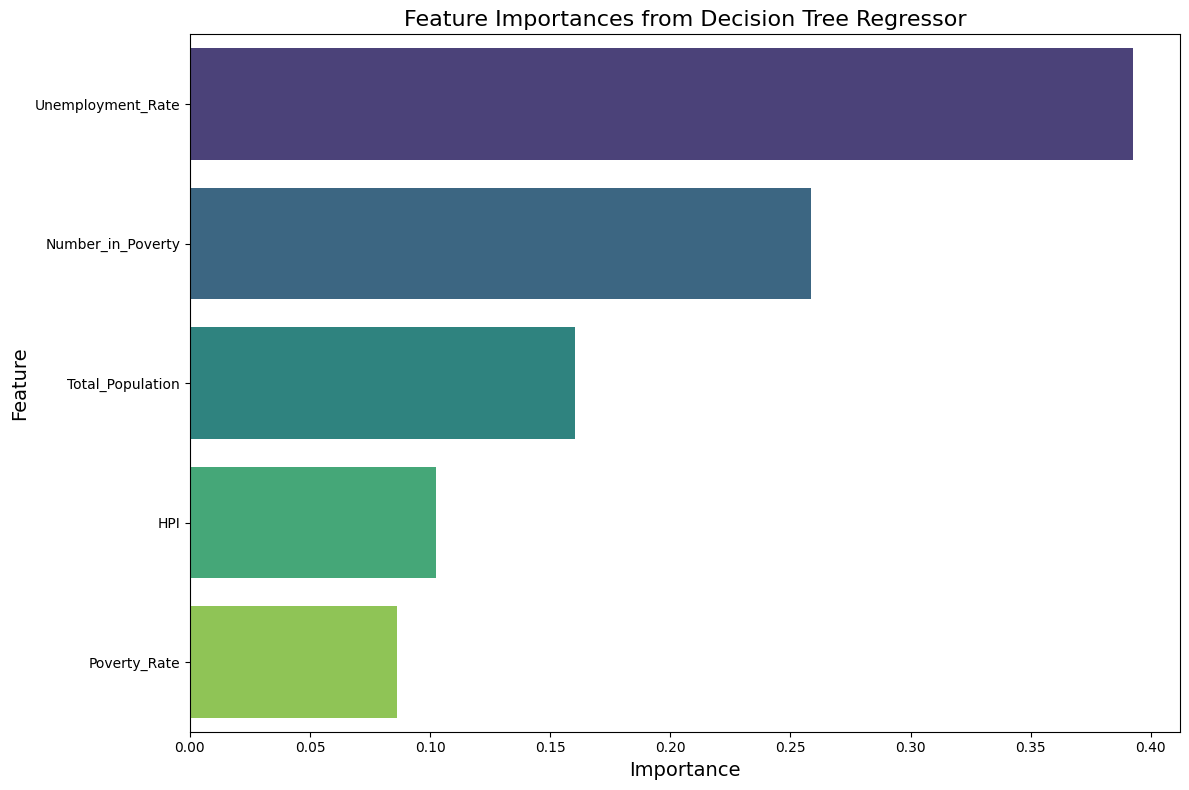

In [103]:
# --- Step 7: Determine Feature Importance ---

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
importances = dt_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Decision Tree Regressor', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()
